1. Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

2. Import CSV file

In [3]:
data = pd.read_csv("airlines_flights_data.csv")

In [4]:
print(data.head(5))

   index   airline   flight source_city departure_time stops   arrival_time  \
0      0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1      1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2      2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3      3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4      4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955  


In [5]:
print("Rows:",len(data))

Rows: 300153


The data set contains 300153 rows and 11 columns, 12 if you include the "index" column

3. Data Understanding and Cleaning

In [6]:
data.columns=[c.strip().replace(" ","_") for c in data.columns] #Standardize column names

In [7]:
#Strip spaces in string columms
for col in data.select_dtypes(include=["object"]).columns:
                                       data[col]= data[col].astype(str).str.strip()   
                                       

In [8]:
#Basic info
print("INFO")
print(data.info())

INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None


In [9]:
print("DESCRIBE (numeric)")
display(data.describe())

DESCRIBE (numeric)


,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


The dataset contains 300,153 records with four numeric variables: index, duration, days_left, and price.

Duration: Flight durations range from 0.83 to 49.83 hours (mean ≈ 12.22 hrs), with half of the flights lasting 11.25 hrs or less.

Days_left: The days until departure span 1 to 49 days (mean ≈ 26 days), with a median of 26 days, indicating a fairly balanced distribution around the center.

Price: Ticket prices range widely from ₦1,105 to ₦123,071, with a median of ₦7,425 but a much higher mean (₦20,889), suggesting price outliers or skewness toward higher values.

Index: Simply represents the record ID (0–300,152) with no analytical meaning.

In [10]:
print("DESCRIBE(categorical sample)")
display(data.describe(include="object"))

DESCRIBE(categorical sample)


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


The dataset has 300,153 records with 8 categorical variables.

Airline: 6 unique airlines, with Vistara being the most frequent (≈ 127,859 flights).

Flight: 1,561 unique flight codes; the most common flight is UK-706 (≈ 3,235 occurrences).

Source_city & Destination_city: 6 unique cities each; Delhi is the most common source, Mumbai the most common destination.

Departure_time & Arrival_time: 6 unique time slots; Morning is the most common departure window, while most arrivals occur at Night.

Stops: 3 categories; one-stop flights dominate.

Class: 2 unique classes; Economy is the majority.

In [11]:
# Missing and Duplicates
print("MISSING VALUES")
display(data.isna().sum().to_frame("missing").sort_values("missing", ascending=False))

MISSING VALUES


,missing
index,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


The dataset has no missing values across all 12 variables (both categorical and numeric). This means:

Data completeness is 100% for every column.

No imputation, deletion, or missing-data handling steps are required before analysis.

Subsequent preprocessing can focus on outlier detection, encoding categorical variables, and feature engineering instead.

In [12]:
dup_count = data.duplicated().sum()# counting the duplicates to confirm
print(f"Duplicates:{dup_count}")

Duplicates:0


In [13]:
# Normalize 'class' column
if "class" in data.columns:
    # Convert to lowercase for consistency
    data["class"] = data["class"].str.lower().str.strip()
    
    # Dictionary of possible typos for each class
    corrections = {
        "business": ["busines", "bussiness", "biz", "businesz"],
        "economy": ["econo", "ecnomy", "economi", "econoimy", "econ"]
    }
    
    # Reverse mapping: typo -> correct label
    mapping = {}
    for correct, typos in corrections.items():
        mapping.update({t: correct for t in typos})
    
    # Apply mapping; default any unknowns to original value
    data["class"] = data["class"].replace(mapping)
    
    # Capitalize final labels
    data["class"] = data["class"].str.title()



In [14]:
# Normalize Stops(e.g.,'non stop", 'Non-stop', 1 stop', '1-stop')
if "stops" in data.columns:
    data["stops"] = (data["stops"]
                     .str.replace("stops", "stop", case=False)
                     .str.replace(" - ","-", regex=False)
                     .str.replace(" ", "-", regex=False)
                     .str.title())

In [15]:
# Common canonical forms:
replacements = {
    "Non-Stop": "Non-stop",
    "0-Stop": "Non-stop",
    "Direct": "Non-stop",
    "1-Stop": "1-stop",
    "2-Stop": "2-stops",
    "2-Stop:": "2-stops",
}
data["stops"] = data["stops"].replace(replacements)

   

In [16]:
# Numerical casts
for col in ["duration", "days_left", "price"]:
    if col in data.columns:
        data[col]=pd.to_numeric(data[col],errors="coerce")

In [17]:
import re

if "stops" in data.columns:
    # Step 1: Query unique values first
    unique_stops = data["stops"].dropna().unique()
    print("Unique stop values before mapping:", unique_stops)
    
    # Step 2: Define mapping for numeric conversion only
    mapping = {
        "zero": 0,
        "one": 1,
        "two_or_more": 2,
        "two or more": 2,
        "≥2": 2,
        "2+": 2,
        "non-stop": 0,
        "non stop": 0,
        "direct": 0,
        "0 stop": 0,
        "0 stops": 0,
        "two_or_more": 2,  
    }

    # Step 3: Apply numeric conversion on a copy, original stays the same
    def stops_to_num(x):
        if pd.isna(x):
            return np.nan
        
        x_str = str(x).strip().lower()
        
        # Direct mapping if found
        if x_str in mapping:
            return mapping[x_str]
        
        # Extract numbers if present
        match = re.search(r"\d+", x_str)
        if match:
            return int(match.group())
        
        return np.nan  # Unrecognized cases become NaN
    
    data["stops_numeric"] = data["stops"].apply(stops_to_num)
    
    # Step 4: Add Non-stop flag
    data["NonStop_Flag"] = (data["stops_numeric"] == 0).astype(int)
    
    # Step 5: Show new unique values
    print("Unique stop values after mapping:", data["stops_numeric"].unique())


Unique stop values before mapping: ['Zero' 'One' 'Two_Or_More']
Unique stop values after mapping: [0 1 2]


In [18]:
print(data["days_left"].dtype)

int64


In [19]:
data["days_left"] = pd.to_numeric(data["days_left"], errors="coerce")

In [20]:
# Booking window bins
if "days_left" in data.columns:
    bins = [-1, 3, 7, 14, 30, 60, 90, 180, 365, np.inf]
    labels = ["0-3", "4-7", "8-14", "15-30", "31-60", "61-90", "91-180", "181-365", "365+"]
    data["Booking_Window"] = pd.cut(data["days_left"], bins=bins, labels=labels)


In [21]:
print(data[["days_left","Booking_Window"]].head(410))

     days_left Booking_Window
0            1            0-3
1            1            0-3
2            1            0-3
3            1            0-3
4            1            0-3
..         ...            ...
405          4            4-7
406          4            4-7
407          4            4-7
408          4            4-7
409          4            4-7

[410 rows x 2 columns]


In [22]:
print("CLEAN SAMPLE")
display(data.head(410))

CLEAN SAMPLE


,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,stops_numeric,NonStop_Flag,Booking_Window
0,0,SpiceJet,SG-8709,Delhi,Evening,Zero,Night,Mumbai,Economy,2.17,1,5953,0,1,0-3
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,Zero,Morning,Mumbai,Economy,2.33,1,5953,0,1,0-3
2,2,AirAsia,I5-764,Delhi,Early_Morning,Zero,Early_Morning,Mumbai,Economy,2.17,1,5956,0,1,0-3
3,3,Vistara,UK-995,Delhi,Morning,Zero,Afternoon,Mumbai,Economy,2.25,1,5955,0,1,0-3
4,4,Vistara,UK-963,Delhi,Morning,Zero,Morning,Mumbai,Economy,2.33,1,5955,0,1,0-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,405,Vistara,UK-933,Delhi,Afternoon,Zero,Evening,Mumbai,Economy,2.17,4,5955,0,1,4-7
406,406,Vistara,UK-985,Delhi,Evening,Zero,Night,Mumbai,Economy,2.17,4,5955,0,1,4-7
407,407,Vistara,UK-995,Delhi,Morning,Zero,Afternoon,Mumbai,Economy,2.25,4,5955,0,1,4-7
408,408,Vistara,UK-977,Delhi,Evening,Zero,Night,Mumbai,Economy,2.25,4,5955,0,1,4-7


3. DESCRIPTIVE ANALYSIS

In [23]:
total_flight = len(data)
print("Total_flights:", total_flight)

Total_flights: 300153


In [24]:
flights_per_airline = data["airline"].value_counts(dropna=False)
print("Flights per airline:")
display(flights_per_airline.to_frame("count"))

Flights per airline:


,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


Flights per Airline

The dataset shows the total number of flights operated by each airline:

Key Insights:

Vistara dominates with the largest share (42.6%) of flights.

Air India comes second (26.9%), while SpiceJet has the smallest share (3%).

Together, Vistara and Air India account for nearly 70% of total flights.

In [24]:
# Create the 'route' column by combining source and destination cities
data["route"] = data["source_city"] + " → " + data["destination_city"]

# Now find the top 5 routes
if "route" in data.columns:
    top5_routes = data["route"].value_counts().head(5)
    print("Top 5 Routes:")
    display(top5_routes.to_frame("count"))


Top 5 Routes:


,count
route,
Delhi → Mumbai,15289
Mumbai → Delhi,14809
Delhi → Bangalore,14012
Bangalore → Delhi,13756
Bangalore → Mumbai,12939


The data shows that the busiest air route is Delhi → Mumbai with 15,289 flights, closely followed by Mumbai → Delhi at 14,809 flights. Delhi → Bangalore (14,012) and Bangalore → Delhi (13,756) are next, while Bangalore → Mumbai (12,939) ranks fifth.

Overall, traffic is heaviest between Delhi, Mumbai, and Bangalore, indicating they are the main air travel hubs in the dataset.

In [27]:
if "route" not in data.columns: # to confirm its presence in the dataset
    data["route"] = data["source_city"] + " → " + data["destination_city"]

# Now group by route to get top 5 routes by average price
route_price = (
    data.groupby("route")["price"]
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

print("Top 5 Routes by Price Performance (Highest Avg Price):")
display(route_price.to_frame("avg_price"))


Top 5 Routes by Price Performance (Highest Avg Price):


,avg_price
route,
Chennai → Bangalore,25081.850454
Kolkata → Chennai,23660.361040
Bangalore → Kolkata,23500.061229
Bangalore → Chennai,23321.850078
Mumbai → Bangalore,23147.873807


Chennai → Bangalore has the highest average ticket price at 25,082, suggesting either high demand, limited flights, or premium pricing.

Kolkata → Chennai (23,660) and Bangalore → Kolkata (23,500) follow closely, indicating that routes involving Kolkata tend to be relatively expensive.

Bangalore → Chennai (23,322) is also high, despite both cities being in southern India—possibly due to fewer flights or business-heavy traffic.

Mumbai → Bangalore (23,148) rounds out the list, showing that two major economic hubs also attract premium prices.

Observation: These routes don’t fully align with the busiest routes earlier. This means high traffic doesn’t always mean high price; pricing likely depends on competition, route distance, and passenger profile.

4. PRICE AND DURATION INSIGHTS

In [28]:
avg_price = data["price"].mean()
print("Average ticket price:", round(avg_price,2))

Average ticket price: 20889.66


The average ticket price is 20889.66(USD) 

In [37]:
if "class" in data.columns:
    price_by_class = data.groupby("class")["price"].mean().sort_values(ascending=False)
    print("Avg price by class:")
    display(price_by_class.to_frame("avg_price"))

Avg price by class:


,avg_price
class,
Business,52540.081124
Economy,6572.342383


Business class tickets average ₹52,540, which is almost 8 times the price of

Economy class tickets average ₹6,572.

This significant gap is expected, as business class offers premium seating, enhanced services, and is targeted at corporate or high-income travelers, while economy caters to the mass market.


In [38]:
if {"duration", "price"}.issubset(data.columns):
    corr_pearson = data[["duration","price"]].corr(method="pearson").iloc[0,1]
    corr_spearman = data[["duration", "price"]].corr(method="spearman").iloc[0,1]
    print(f"\\nCorrelation Duration vs Price - Pearson:{corr_pearson:.3f}, Spearman:{corr_spearman:.3f}")

\nCorrelation Duration vs Price - Pearson:0.204, Spearman:0.319


Pearson (0.204) → Shows a weak positive linear correlation between flight duration and price. As duration increases, price tends to rise, but the relationship isn’t very strong or strictly linear.

Spearman (0.319) → Indicates a moderate positive monotonic correlation, meaning longer flights generally cost more, but not in a perfectly consistent way.

Bottom line: Price increases with duration, but other factors—like demand, route popularity, or airline pricing strategies—play a bigger role than just flight length.

5. STOPS & NON-STOP INSIGHTS

In [39]:
if "stops" in data.columns:
    price_by_stops = data.groupby("stops")["price"].mean().sort_values(ascending=False)
    print("Avg price by stops:")
    display(price_by_stops.to_frame("avg_price"))

if {"NonStop_Flag", "airline"}.issubset(data.columns):
    nonstop_counts= data[data["NonStop_Flag"] ==1]["airline"].value_counts()
    print("\nAirline with most non-stop flights:")
    display(nonstop_counts.to_frame("nonstop_count"))

Avg price by stops:


,avg_price
stops,
One,22900.992482
Two_Or_More,14113.450775
Zero,9375.938535



Airline with most non-stop flights:


,nonstop_count
airline,
Indigo,11216
Vistara,10260
Air_India,6409
GO_FIRST,3223
SpiceJet,2462
AirAsia,2434


1. Average Price by Stops

One stop (₹22,901) has the highest average price — likely because connecting flights on key routes are priced higher due to demand or limited options.

Two or more stops (₹14,113) are cheaper, possibly because passengers trade time/convenience for cost savings.

Non-stop (₹9,376) is the cheapest on average, which is surprising because in many markets, direct flights cost more — this suggests heavy competition on popular direct routes drives prices down.

2. Airlines with Most Non-stop Flights

Indigo (11,216) leads in non-stop flights, followed by Vistara (10,260) and Air India (6,409).

Smaller players like GO_FIRST, SpiceJet, and AirAsia contribute fewer non-stop flights overall.

Key Insight: Non-stop flights dominate pricing efficiency, and Indigo plus Vistara clearly focus on serving this demand aggressively.

6. BOOKING BEHAVIOUR

In [40]:
if "days_left" in data.columns:
    avg_by_daysleft = (
        data.groupby("days_left")["price"]
        .mean()
        .reset_index()
        .sort_values("price", ascending = False)
    )
    print("Average price per exact Days_Left:")
    display(avg_by_daysleft.head(10))


Average price per exact Days_Left:


,days_left,price
1,2,30211.299801
2,3,28976.083569
4,5,26679.773368
3,4,25730.905653
8,9,25726.246072
6,7,25588.367351
9,10,25572.819134
7,8,24895.883995
5,6,24856.493902
10,11,22990.656070


1–2 days before departure has the highest average price (₹30,211), showing that last-minute bookings cost the most.

Prices gradually decrease as the gap between booking and departure widens: e.g., 2–3 days (₹28,976) → 4–5 days (₹26,679) → 10–11 days (₹22,991).

The trend suggests early booking leads to cheaper fares, which is consistent with most airline pricing models.

In [41]:
if "Booking_Window" in data.columns:
    avg_by_window = (
        data.groupby("Booking_Window")["price"]
        .mean()
        .reset_index()
        .sort_values("price", ascending = False)
    )
    print("\nAverage price by booking window:")
    display(avg_by_window)



Average price by booking window:


C:\Users\USER\AppData\Local\Temp\ipykernel_15128\2262111149.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("Booking_Window")["price"]


,Booking_Window,price
0,0-3,28068.681894
1,4-7,25698.242059
2,8-14,23768.362808
3,15-30,19888.759071
4,31-60,19260.919021
5,61-90,NaN
6,91-180,NaN
7,181-365,NaN
8,365+,NaN


0–3 days before travel: ₹28,069 → Highest prices because last-minute bookings are usually premium.

4–7 days: ₹25,698 and 8–14 days: ₹23,768 → Prices start dropping as the booking window widens.

15–30 days: ₹19,889 and 31–60 days: ₹19,261 → Cheapest period for ticket purchases; airlines reward early planners with lower fares.

61+ days: NaN → No data available, possibly due to very few bookings this far in advance in your dataset.

Key takeaway:
Booking 3–8 weeks before travel seems to give the best balance between price and availability.

7. VISUALIZATIONS

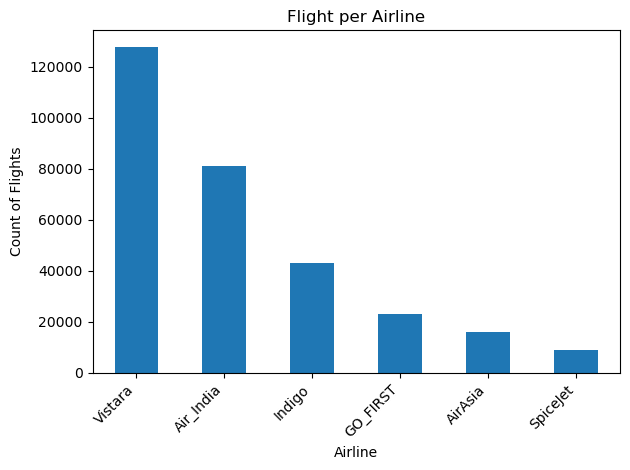

In [42]:
import matplotlib.pyplot as plt
# Bar: Flights per airline
counts =data["airline"].value_counts()
plt.figure()
counts.plot(kind="bar")
plt.title("Flight per Airline")
plt.xlabel("Airline")
plt.ylabel("Count of Flights")
plt.xticks(rotation = 45, ha = "right")
plt.tight_layout()
plt.show()


Vistara dominates with the highest number of flights,over 125,000, showing strong market presence.

Air India follows at around 80,000 flights, while Indigo sits in third place with roughly 43,000 flights.

GO_FIRST, AirAsia, and SpiceJet have much smaller flight volumes, with SpiceJet having the least at under 10,000 flights.

Key Insight: The market is heavily concentrated at the top, with Vistara and Air India handling the majority of flights, while smaller carriers have limited reach.

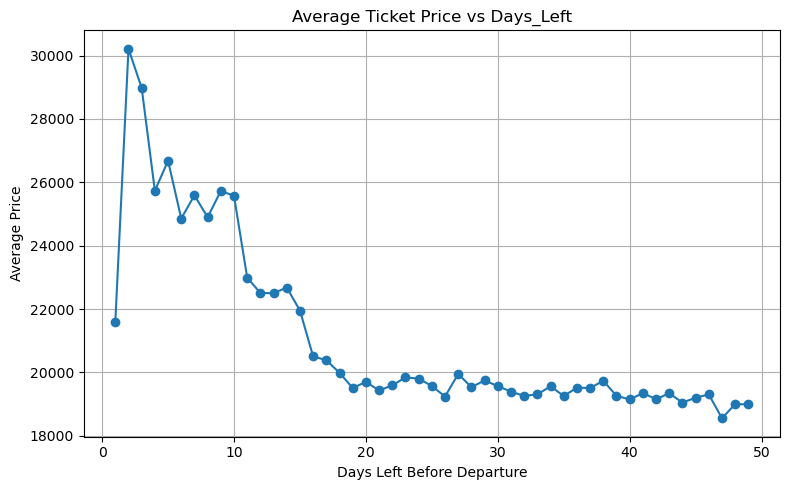

In [43]:
# Line: Average Price vs Days_Left
if "days_left" in data.columns:
    avg_by_daysleft = data.groupby("days_left")["price"].mean().sort_index()

    if not avg_by_daysleft.empty:
        plt.figure(figsize=(8, 5))
        plt.plot(avg_by_daysleft.index, avg_by_daysleft.values, marker='o')
        plt.title("Average Ticket Price vs Days_Left")
        plt.xlabel("Days Left Before Departure")
        plt.ylabel("Average Price")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("No data available after grouping by 'days_Left'.")


Prices spike sharply when there are 1–3 days left before departure, peaking above ₹30,000 for last-minute bookings.

As the days left increase, prices drop steadily, especially after 10–15 days, where fares stabilize around ₹19,000–20,000.

Beyond 20 days, prices remain relatively flat with small fluctuations, showing early booking benefits flatten out after a point.

Key takeaway: Booking well in advance ideally 3+ weeks before departure gives the best chance of lower ticket prices.

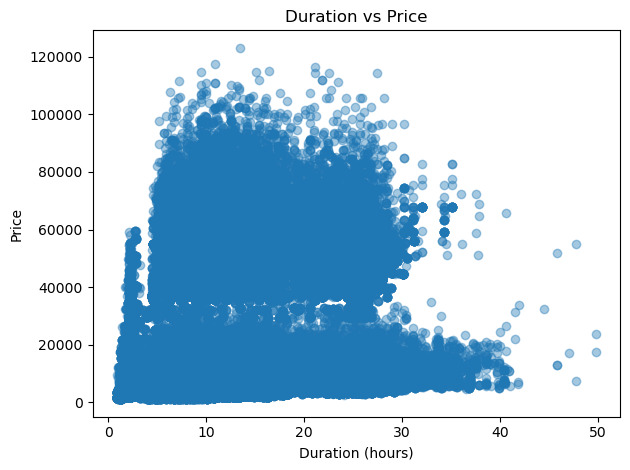

In [34]:
# Scatter: Duration vs Price
if {"duration", "price"}.issubset(data.columns):
    plt.figure()
    plt.scatter(data["duration"], data["price"], alpha=0.4)
    plt.title("Duration vs Price")
    plt.xlabel("Duration (hours)")
    plt.ylabel("Price")
    plt.tight_layout()
    plt.show()


The plot shows that while longer flight durations generally cost more, the relationship is weak and scattered, not strictly linear.

Most flights fall within 0–15 hours duration and ₹0–60,000 price, indicating this is the typical range for the dataset.

A few outliers appear with extremely long durations (30–50 hours) and high prices (above ₹80,000), likely representing multi-stop or irregular routes.

The clustering patterns suggest airlines use pricing tiers or fare buckets, rather than pricing solely based on flight length.

Conclusion: Flight duration has some influence on price, but other factors like stops, routes, and airline pricing strategies play a larger role.

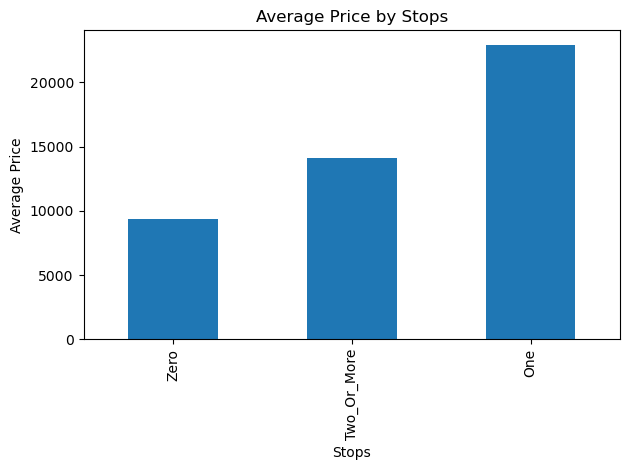

In [35]:
# Bar: Avg Price by Stops
if "stops" in data.columns:
    price_by_stops = data.groupby("stops")["price"].mean().sort_values(ascending=True)
    plt.figure()
    price_by_stops.plot(kind="bar")
    plt.title("Average Price by Stops")
    plt.xlabel("Stops")
    plt.ylabel("Average Price")
    plt.tight_layout()
    plt.show()


Flights with zero stops (direct flights) are the cheapest on average, around ₹9,500.

Flights with two or more stops have a higher average price, about ₹14,000, suggesting longer or more complex itineraries add to costs.

Interestingly, flights with one stop are the most expensive, averaging above ₹22,000 — higher than even two-stop flights.

Conclusion: Stopovers don’t always reduce costs. While direct flights are cheapest, one-stop flights are the costliest, likely reflecting airline route strategies, demand for popular hubs, and fewer cheaper fare options compared to multi-stop itineraries.

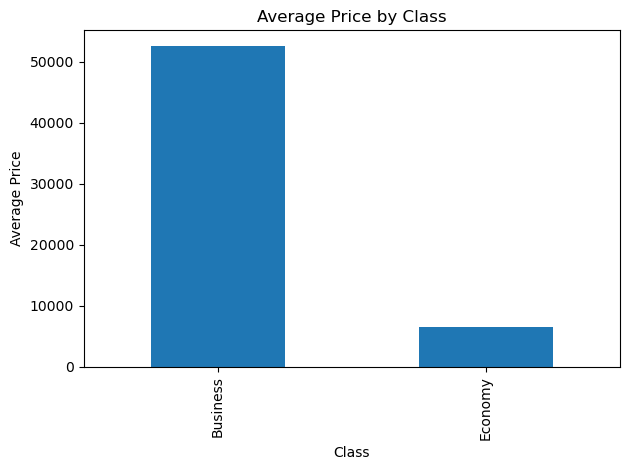

In [36]:
# Bar: Avg Price by Class
if "class" in data.columns:
    price_by_class = data.groupby("class")["price"].mean().sort_values(ascending=False)
    plt.figure()
    price_by_class.plot(kind="bar")
    plt.title("Average Price by Class")
    plt.xlabel("Class")
    plt.ylabel("Average Price")
    plt.tight_layout()
    plt.show()


Business class flights are significantly more expensive, averaging above ₹52,000.

Economy class flights are far cheaper, with an average price of around ₹6,500.

This indicates a sharp price gap between the two classes, with business fares being nearly 8 times higher than economy.

Conclusion: Ticket class is a major determinant of price, with business travelers paying a heavy premium for comfort and exclusivity, while economy remains the budget-friendly choice.

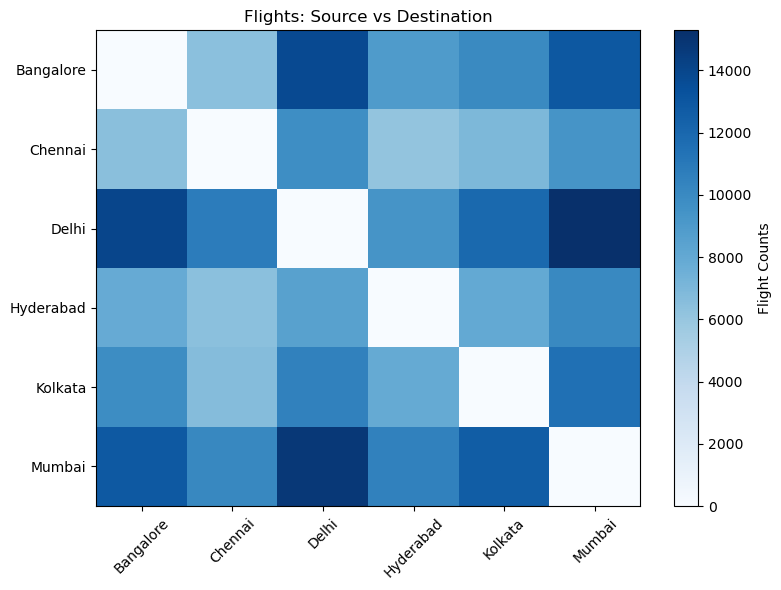

In [37]:
# Heatmap: Source vs Destination (counts)
if {"source_city", "destination_city"}.issubset(data.columns):
    pivot_counts = pd.pivot_table(
        data,
        index="source_city",
        columns="destination_city",
        aggfunc="size",  
        fill_value=0
    )
    plt.figure(figsize=(8, 6))
    plt.imshow(pivot_counts.values, aspect="auto", cmap="Blues")
    plt.colorbar(label="Flight Counts")
    plt.xticks(range(len(pivot_counts.columns)), pivot_counts.columns, rotation=45)
    plt.yticks(range(len(pivot_counts.index)), pivot_counts.index)
    plt.title("Flights: Source vs Destination")
    plt.tight_layout()
    plt.show()


The darkest blue cells represent the highest flight counts between source and destination cities.

Delhi ↔ Mumbai and Delhi ↔ Bangalore stand out as the busiest routes since they have the deepest color intensity, confirming earlier results.

Hyderabad and Kolkata show moderate connectivity, with mid-level counts to most other cities.

Chennai has lighter shades with most cities, suggesting fewer flights compared to Delhi, Mumbai, and Bangalore.

The diagonal is white because a city cannot be a source and destination at the same time in this dataset.

Conclusion: Delhi, Mumbai, and Bangalore dominate India’s flight network, while other cities play more secondary roles in connectivity.

8. KPI SNAPSHOT

In [38]:
kpis = {}
kpis["Total Flights"] = len(data)
kpis["Average Price"] = round(data["price"].mean(), 2)
kpis["Average Duration (hrs)"] = round(data["duration"].mean(), 2)
if "NonStop_Flag" in data.columns:
    kpis["% Non-stop"] = round(100 * data["NonStop_Flag"].mean(), 2)
    for k,v in kpis.items():
        print(f"{k}: {v}")


Total Flights: 300153
Average Price: 20889.66
Average Duration (hrs): 12.22
% Non-stop: 12.0


9. EXPORT CLEAN DATA AND SUMMARY TABLES

In [39]:
data.to_csv("airline_clean.csv",index=False)

In [40]:
#Export handy summary tables

data["airline"].value_counts().to_frame("count").to_csv("flights_per_airline.csv")
if "route" in data.columns:
    data["route"].value_counts().to_frame("count").head(50).to_csv("top_routes.csv")
    data.groupby("airline")["price"].mean().to_frame("avg_price").to_csv("avg_price_by_airline.csv")
if "class" in data.columns:
    data.groupby("class")["price"].mean().to_frame("avg_price").to_csv("avg_price_by_class.csv")
if "stops" in data.columns:
    data.groupby("stops")["price"].mean().to_frame("avg_price").to_csv("avg_price_by_stops.csv")
if "days_left" in data.columns:
    data.groupby("days_left")["price"].mean().to_frame("avg_price").to_csv("avg_price_by_daysleft.csv")
if "Booking_Window" in data.columns:
    data.groupby("Booking_Window")["price"].mean().to_frame("avg_price").to_csv("avg_price_by_window.csv")

print("Files exported to:","CLOUD TECH INTERNSHIP")


Files exported to: CLOUD TECH INTERNSHIP


C:\Users\USER\AppData\Local\Temp\ipykernel_4356\365665929.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("Booking_Window")["price"].mean().to_frame("avg_price").to_csv("avg_price_by_window.csv")
